# MASTML

In [1]:
import pickle
import numpy as np
import pandas as pd
import itertools
from mastml.mastml import Mastml
from mastml.feature_generators import ElementalFeatureGenerator, ElementalFractionGenerator
# from mastml.feature_generators import ElementalFeatureGenerator
import matplotlib.pyplot as plt


## Load Data

In [2]:

pfile_X = "Codes/bandgap_pbe_X.pickle"
pfile_Y = "Codes/bandgap_pbe_Y.pickle"

In [3]:
with open(pfile_X, 'rb') as f:
    data = pickle.load(f)

In [4]:
with open(pfile_Y, 'rb') as f:
    data_y = pickle.load(f)

In [5]:
x_clean = data[['composition', 'structure', 'space group']]
# print("x_clean", x_clean)

composition = x_clean['composition']
structure = x_clean['structure']

m = float("inf")

# foo = structure[m]
# compositions = [composition[i] for i in range(m)]
compositions = [comp for i, comp in enumerate(composition) if i < m]

# sites = foo['sites']
# print("compositions", compositions)
print("num compositions", len(compositions))

num compositions 74992


In [6]:
# data_y
# _ = plt.hist(data_y, bins='auto')
# plt.title("Histogram")
# plt.show()

### Vectorize

In [7]:
# df = pd.DataFrame([compositions])
# df = pd.DataFrame(compositions)
df = pd.DataFrame(compositions[1000:4000])
# print("df shape", df.shape)

# print("initialize generator...")
e = ElementalFeatureGenerator(df)
efg = ElementalFractionGenerator(df)

# print("fitting...")
e.fit()
efg.fit()
 
# print("transform...")
x, _ = e.transform()
efg_x, efg_y = efg.transform(fraction=False)

print("vector shape", x.shape, "y", _)


Dropping 5/440 generated columns due to missing values
vector shape (3000, 435) y None


In [8]:
x

,AtomicNumber_arithmetic_average,AtomicNumber_composition_average,AtomicNumber_difference,AtomicNumber_max_value,AtomicNumber_min_value,AtomicRadii_arithmetic_average,AtomicRadii_composition_average,AtomicRadii_difference,AtomicRadii_max_value,AtomicRadii_min_value,...,phi_arithmetic_average,phi_composition_average,phi_difference,phi_max_value,phi_min_value,valence_arithmetic_average,valence_composition_average,valence_difference,valence_max_value,valence_min_value
0,42.250000,40.400000,29.0,59.0,30.0,1.498500,1.476800,0.496,1.828,1.332,...,4.110000,4.248000,1.61,4.80,3.19,3.000000,3.400000,3.0,5.0,2.0
1,15.333333,14.000000,19.0,27.0,8.0,1.294333,1.003900,1.170,1.900,0.730,...,2.600000,1.800000,2.40,5.10,2.70,2.000000,2.200000,2.0,3.0,1.0
2,42.250000,40.600000,56.0,81.0,25.0,1.407000,1.405600,0.470,1.710,1.240,...,3.200000,2.560000,0.55,4.45,3.90,4.500000,4.800000,5.0,7.0,2.0
3,20.333333,16.875000,20.0,28.0,8.0,1.072000,0.985750,0.516,1.246,0.730,...,3.216667,2.318750,0.75,5.20,4.45,4.000000,4.000000,5.0,7.0,2.0
4,27.333333,26.000000,39.0,46.0,7.0,1.191000,1.209222,0.455,1.375,0.920,...,5.586667,5.096667,2.41,6.86,4.45,3.666667,2.888889,3.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,10.250000,9.882353,22.0,25.0,3.0,1.125000,0.960588,0.820,1.550,0.730,...,3.150000,2.055882,2.45,5.30,2.85,3.250000,2.941176,6.0,7.0,1.0
2996,10.750000,11.333333,20.0,23.0,3.0,1.080250,0.946889,0.830,1.550,0.720,...,1.775000,1.261111,1.40,4.25,2.85,2.250000,2.000000,4.0,5.0,1.0
2997,32.333333,25.000000,80.0,83.0,3.0,1.716667,1.675000,0.350,1.900,1.550,...,3.233333,3.137500,1.45,4.15,2.70,2.333333,2.000000,4.0,5.0,1.0
2998,56.000000,51.500000,42.0,80.0,38.0,1.790000,1.880000,0.550,2.150,1.600,...,3.583333,3.287500,1.80,4.20,2.40,2.666667,2.500000,2.0,4.0,2.0


In [17]:
y = data_y
y = pd.DataFrame(y[1000:4000])

### Featurize

In [10]:
from mastml.preprocessing import SklearnPreprocessor
from mastml.feature_selectors import SklearnFeatureSelector, EnsembleModelFeatureSelector
from mastml.models import SklearnModel

XGBoost is an optional dependency. If you want to use XGBoost models, please manually install xgboost package with pip install xgboost. If have error with finding libxgboost.dylib library, dobrew install libomp. If do not have brew on your system, first do ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" from the Terminal


In [18]:
model = SklearnModel(model='RandomForestRegressor')
selector = EnsembleModelFeatureSelector(model=model, 
                                        n_features_to_select=20)
X_selected = selector.evaluate(X=x, y=y)

/Users/averychan/Documents/root/college/junior/Fall/MAST-ML/mastml/models.py:84: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self.model.fit(X, y)


In [20]:
print(X_selected)
x = X_selected

      valence_min_value  IonicRadii_composition_average  \
0                   2.0                        0.836000   
1                   1.0                        1.137000   
2                   2.0                        0.798000   
3                   2.0                        1.037500   
4                   2.0                        0.937778   
...                 ...                             ...   
2995                1.0                        0.989412   
2996                1.0                        1.098889   
2997                1.0                        0.892500   
2998                2.0                        1.062500   
2999                2.0                        1.318889   

      ThermalExpansionCoefficient_composition_average  \
0                                           17.060000   
1                                          479.000000   
2                                           31.620000   
3                                          399.812500   
4     

## GPR

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, ConstantKernel
import time

#### GPR for ElementalFeatureGenerator information

In [26]:

gp_kernel = ConstantKernel() * Matern() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=gp_kernel, n_restarts_optimizer=10)
stime = time.time()
print("Start fitting")
gpr.fit(x, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))
print("Done")

Start fitting
Time for GPR fitting: 1189.457
Done


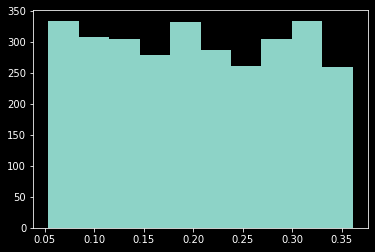

In [33]:
_ = plt.hist(y)
plt.show()

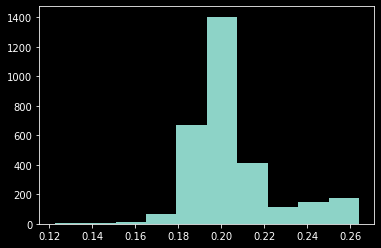

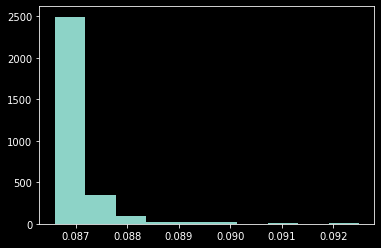

In [32]:
y_, std_ = gpr.predict(x, return_std=True)
# print("y_", y_)
# print("std_", std_)

_ = plt.hist(y_)
plt.show()
_ = plt.hist(std_)
plt.show()

#### GPR for atomic table

In [23]:
# list(x.items())
# print(*x.items(), sep="\n")
# print(x.iloc[0])

## verify rows sum to 1
# total = x.sum(axis=1, numeric_only= True)
# print("total", total)

# material_group_char = ["O", "B", "F", "Cl", "Br", "I"]
material_group_char = ["O"]
thresholds = [0]
for mat in material_group_char:
    continue
    print("Grouping for", mat)
    st1 = 100
    st2 = 10

    for th in thresholds:
        # Make split
        group_X = x[x[mat] > th]
        not_group_X = x[x[mat] <= th]
        # group_y = [None for x in group_X]
        # not_group_y = [None for x in not_group_y]
        group_y = y[x[mat] > th]
        not_group_y = y[x[mat] <= th]

        perc_in_group = group_X.shape[0]/x.shape[0]
        print(f"\ttheshold:\t{th}\n\tpercent in {mat}_group:\t{perc_in_group}")
        # if the split leaves an empty group skip
        if perc_in_group == 0:
            continue

        # group_X.iloc(100)
        group_X = np.array(group_X)
        group_y = np.array(group_y)

        group_X = group_X[0:1000,:]
        group_y = group_y[0:1000,:]
        
        # do GPR stuff
        print(f"Doing GPR for {mat}")
        # gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) + WhiteKernel(1e-1) 
        gp_kernel = ConstantKernel() * Matern() + WhiteKernel()
        gpr = GaussianProcessRegressor(kernel=gp_kernel, n_restarts_optimizer=10)
        print("gpr:", gpr)
        # break
        stime = time.time()
        print("Start fitting")
        # gpr.fit(group_X, group_y)
        print("Time for GPR fitting: %.3f" % (time.time() - stime))
        print("Done")

        x_, std_ = gpr.predict(group_X, return_std=True)
        print("x_", x_)
        print("std_", std_)

        # Predict using gaussian process regressor
        # stime = time.time()
        # y_gpr = gpr.predict(X_plot, return_std=False)
        # print("Time for GPR prediction: %.3f" % (time.time() - stime))

# gpr.kernel_
# np.std(group_X)